In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
path = Path.cwd()/'logs2'
path

PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2')

In [3]:
files = [f for f in path.iterdir()]
files

[PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/adamw_5e-07_0.001_SchedulerType.LINEAR_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/adamw_0.0001_0.001_SchedulerType.LINEAR_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/adamw_1e-05_0.0_SchedulerType.LINEAR_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/adamw_0.0005_0.01_SchedulerType.LINEAR_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/sgd_5e-05_0.0_SchedulerType.CONSTANT_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/radam_1e-08_0.0_SchedulerType.CONSTANT_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/activeadam_1e-05_0.0_SchedulerType.CONSTANT_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/adamw_5e-08_0.001_SchedulerType.CONSTANT_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/activeadam_1e-07_0.0001_SchedulerType.CONSTANT_1_42.json'),
 PosixPath('/Users/davoodwadi/supp/WikiText-2/logs2/

In [4]:
f = files[0]
fname = f.stem
meta = fname.split('_')
meta

['adamw', '5e-07', '0.001', 'SchedulerType.LINEAR', '1', '42']

For SGDs, we use lr_range = lr_range * 50

In [5]:
lrMin = 1e-8
lrMax = 1e-4

lrMinSGD = lrMin * 50
lrMaxSGD = lrMax * 50
lrMin, lrMax, lrMinSGD, lrMaxSGD

(1e-08, 0.0001, 5e-07, 0.005)

In [6]:
def extract_meta(f):
    fname = f.stem
    meta = fname.split('_')
    optim = meta[0]
    lr = float(meta[1])
    wd = float(meta[2])
    scheduler = ((meta[3]).split('.'))[1]
    bs = int(meta[4])
    seed = int(meta[5])
    try:
        with open(f, 'r') as file:
            data = json.load(file)
    except:
        print(f)
    return optim, lr, wd, scheduler, bs, seed, data

In [7]:
dictt = {
    
    'optim':[],
    'lr':[],
    'wd':[],
    'scheduler':[],
    'bs':[],
    'seed':[],
    'best_ppl':[],
    'best_test':[],
    'train_losses':[],
    'valid_ppls':[],
    'test_ppls':[],
    'epoch_time':[],
    'epochs':[],
}
for f in files:
    optim, lr, wd, scheduler, bs, seed, data = extract_meta(f)
    
    if (optim=='sgd' or optim=='activesgd') and (lr>lrMaxSGD or lr<lrMinSGD):
        continue
    if (optim!='sgd' and optim!='activesgd') and (lr>lrMax or lr<lrMin):
        continue
        
    dictt['optim'].append(optim)
    dictt['lr'].append(lr)
    dictt['wd'].append(wd)
    dictt['scheduler'].append(scheduler)
    dictt['bs'].append(bs)
    dictt['seed'].append(seed)
    dictt['valid_ppls'].append(data.get('valid_ppls'))
    dictt['test_ppls'].append(data.get('test_ppls'))
    dictt['best_ppl'].append(min(data.get('valid_ppls')))
    dictt['best_test'].append(min(data.get('test_ppls')))
#     dictt['best_ppl'].append(data.get('best_ppl'))
#     dictt['best_test'].append(data.get('best_test'))
    dictt['train_losses'].append(data.get('train_losses'))

    dictt['epoch_time'].append(data.get('epoch_time'))
    dictt['epochs'].append(data.get('epochs'))
dictt

{'optim': ['adamw',
  'adamw',
  'adamw',
  'sgd',
  'radam',
  'activeadam',
  'adamw',
  'activeadam',
  'activeadam',
  'adamw',
  'adamw',
  'adabelief',
  'adamw',
  'activeadam',
  'adabelief',
  'activeadam',
  'activeadam',
  'activeadam',
  'activeadam',
  'radam',
  'activeadam',
  'activeadam',
  'activeadam',
  'activeadam',
  'adamw',
  'sgd',
  'radam',
  'adamw',
  'activeadam',
  'adamw',
  'activeadam',
  'activesgd',
  'adabelief',
  'activeadam',
  'adamw',
  'activeradam',
  'activeadam',
  'adamw',
  'activeadam',
  'activeadam',
  'activeradam',
  'activeadam',
  'adamw',
  'adamw',
  'activesgd',
  'adabelief',
  'adamw',
  'activeadam',
  'activeadam',
  'adamw',
  'activeradam',
  'adamw',
  'adamw',
  'activeadam',
  'adamw',
  'activebelief',
  'activeadam',
  'adamw',
  'activeadam',
  'adamw',
  'activeadam',
  'adamw',
  'adamw',
  'adamw',
  'adamw',
  'adamw',
  'activebelief',
  'adamw',
  'activeradam',
  'adamw',
  'adamw',
  'activesgd',
  'adamw',
 

In [8]:
df = pd.DataFrame(dictt)
df

optim            lr     wd scheduler  bs  seed   best_ppl  \
0         adamw  5.000000e-07  0.001    LINEAR   1    42  22.519359   
1         adamw  1.000000e-04  0.001    LINEAR   1    42  22.267765   
2         adamw  1.000000e-05  0.000    LINEAR   1    42  21.068823   
3           sgd  5.000000e-05  0.000  CONSTANT   1    42  21.545019   
4         radam  1.000000e-08  0.000  CONSTANT   1    42  25.098052   
..          ...           ...    ...       ...  ..   ...        ...   
187  activeadam  5.000000e-08  0.010    LINEAR   1    42  25.615898   
188   adabelief  5.000000e-05  0.000  CONSTANT   1    42  21.415767   
189   activesgd  1.000000e-06  0.000  CONSTANT   1    42  22.305257   
190       adamw  1.000000e-05  0.001    LINEAR   1    42  21.068823   
191  activeadam  5.000000e-07  0.000  CONSTANT   1    42  21.291083   

     best_test                                       train_losses  \
0    21.844956  [3.517073392868042, 3.402616500854492, 3.35635...   
1    21.711022  [3.236656427383423, 2.923722982406616, 2.70815...   
2    20.523473  [3.27854323387146, 3.1392786502838135, 3.07949...   
3    20.979254  [3.4690518379211426, 3.387401580810547, 3.3536...   
4    24.251084  [3.735184907913208, 3.703855514526367, 3.67415...   
..         ...                                                ...   
187  24.756589  [3.665109157562256, 3.591106414794922, 3.55710...   
188  20.860154  [3.250737190246582, 3.043264865875244, 2.88528...   
189  21.710768  [3.6424996852874756, 3.5862009525299072, 3.563...   
190  20.523473  [3.27854323387146, 3.1392786502838135, 3.07949...   
191  20.746934  [3.514943838119507, 3.3959341049194336, 3.3422...   

                                            valid_ppls  \
0    [25.907044823633644, 24.7905923163653, 24.1885...   
1    [22.26776497177836, 22.611109206375268, 23.573...   
2    [21.795373062050288, 21.329661188183596, 21.15...   
3    [25.80324968032719, 25.08041802452274, 24.6878...   
4    [30.360717801865043, 30.075025402727302, 29.82...   
..                                                 ...   
187  [29.202253531548426, 28.51373509420506, 28.007...   
188  [21.578135265952167, 21.415767402149143, 21.63...   
189  [28.583781310042358, 28.347509145839545, 28.17...   
190  [21.795373062050288, 21.329661188183596, 21.15...   
191  [25.819003541294922, 24.600080841099984, 23.87...   

                                             test_ppls  epoch_time  \
0    [25.03985510157257, 23.965612887541138, 23.392...  343.641961   
1    [21.711022103659655, 22.108344875708443, 23.04...  337.151140   
2    [21.1891337850308, 20.759254028956445, 20.6049...  342.697503   
3    [25.02458261629898, 24.302898591438073, 23.912...  319.174458   
4    [29.212016391568785, 28.94973378959884, 28.721...  345.550004   
..                                                 ...         ...   
187  [28.143764249701054, 27.505969589544744, 27.03...  380.887849   
188  [21.03050528283861, 20.86015423165144, 21.1274...  354.016345   
189  [27.610530791452785, 27.40607080729397, 27.249...  328.211321   
190  [21.1891337850308, 20.759254028956445, 20.6049...  336.588602   
191  [24.955314162234696, 23.782178341819773, 23.10...  380.030288   

                                                epochs  
0    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
2    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
3    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
4    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
..                                                 ...  
187  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
188  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
189  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
190  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
191  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  

[192 rows x 13 columns]

In [9]:
df.lr.unique()

array([5.e-07, 1.e-04, 1.e-05, 5.e-05, 1.e-08, 5.e-08, 1.e-07, 1.e-06,
       5.e-06, 5.e-03, 1.e-03, 5.e-04])

# all optims

## best test

In [10]:
pivot = df.pivot_table('best_test', df.optim, df.lr, aggfunc='min')
pivot

lr            1.000000e-08  5.000000e-08  1.000000e-07  5.000000e-07  \
optim                                                                  
activeadam       21.435378     20.882512     20.806584     20.746934   
activebelief     21.371942     20.819640     20.745390     20.706763   
activeradam      21.437565     20.879600     20.802939     20.757151   
activesgd              NaN           NaN           NaN     22.285318   
adabelief        23.887803     21.411351     21.003011     20.665882   
adamw            24.239528     21.490029     21.050129     20.732001   
radam            24.251084     21.493144     21.050792     20.711340   
sgd                    NaN           NaN           NaN     24.707759   

lr            1.000000e-06  5.000000e-06  1.000000e-05  5.000000e-05  \
optim                                                                  
activeadam       20.715256     20.589191     20.489459     20.828507   
activebelief     20.676226     20.592868     20.513635     20.863527   
activeradam      20.719385     20.616182     20.539181     20.845796   
activesgd        21.710768     20.803088     20.586879     20.497629   
adabelief        20.660930     20.577329     20.518140     20.860154   
adamw            20.694410     20.582383     20.491467     20.829222   
radam            20.701279     20.605224     20.533369     20.820549   
sgd              23.971167     22.261416     21.624373     20.979254   

lr            1.000000e-04  5.000000e-04  1.000000e-03  5.000000e-03  
optim                                                                 
activeadam       21.695830           NaN           NaN           NaN  
activebelief     21.652165           NaN           NaN           NaN  
activeradam      21.721408           NaN           NaN           NaN  
activesgd        20.508403     20.497883     20.527628     20.713404  
adabelief        21.656889           NaN           NaN           NaN  
adamw            21.710561           NaN           NaN           NaN  
radam            21.546812           NaN           NaN           NaN  
sgd              20.683898     20.524266     20.510960     20.710787

In [11]:
pivot_ = pivot.transpose()
pivot_

optim         activeadam  activebelief  activeradam  activesgd  adabelief  \
lr                                                                          
1.000000e-08   21.435378     21.371942    21.437565        NaN  23.887803   
5.000000e-08   20.882512     20.819640    20.879600        NaN  21.411351   
1.000000e-07   20.806584     20.745390    20.802939        NaN  21.003011   
5.000000e-07   20.746934     20.706763    20.757151  22.285318  20.665882   
1.000000e-06   20.715256     20.676226    20.719385  21.710768  20.660930   
5.000000e-06   20.589191     20.592868    20.616182  20.803088  20.577329   
1.000000e-05   20.489459     20.513635    20.539181  20.586879  20.518140   
5.000000e-05   20.828507     20.863527    20.845796  20.497629  20.860154   
1.000000e-04   21.695830     21.652165    21.721408  20.508403  21.656889   
5.000000e-04         NaN           NaN          NaN  20.497883        NaN   
1.000000e-03         NaN           NaN          NaN  20.527628        NaN   
5.000000e-03         NaN           NaN          NaN  20.713404        NaN   

optim             adamw      radam        sgd  
lr                                             
1.000000e-08  24.239528  24.251084        NaN  
5.000000e-08  21.490029  21.493144        NaN  
1.000000e-07  21.050129  21.050792        NaN  
5.000000e-07  20.732001  20.711340  24.707759  
1.000000e-06  20.694410  20.701279  23.971167  
5.000000e-06  20.582383  20.605224  22.261416  
1.000000e-05  20.491467  20.533369  21.624373  
5.000000e-05  20.829222  20.820549  20.979254  
1.000000e-04  21.710561  21.546812  20.683898  
5.000000e-04        NaN        NaN  20.524266  
1.000000e-03        NaN        NaN  20.510960  
5.000000e-03        NaN        NaN  20.710787

In [12]:
pivot_ = pivot_[['activeadam','adamw', 
                 'activebelief','adabelief',
                 'activeradam', 'radam',  
                 'activesgd', 'sgd'  
                ]]
pivot_= pivot_.rename(columns={'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'})
pivot_

optim         ActiveAdamW      AdamW  ActiveBelief  AdaBelief  ActiveRAdam  \
lr                                                                           
1.000000e-08    21.435378  24.239528     21.371942  23.887803    21.437565   
5.000000e-08    20.882512  21.490029     20.819640  21.411351    20.879600   
1.000000e-07    20.806584  21.050129     20.745390  21.003011    20.802939   
5.000000e-07    20.746934  20.732001     20.706763  20.665882    20.757151   
1.000000e-06    20.715256  20.694410     20.676226  20.660930    20.719385   
5.000000e-06    20.589191  20.582383     20.592868  20.577329    20.616182   
1.000000e-05    20.489459  20.491467     20.513635  20.518140    20.539181   
5.000000e-05    20.828507  20.829222     20.863527  20.860154    20.845796   
1.000000e-04    21.695830  21.710561     21.652165  21.656889    21.721408   
5.000000e-04          NaN        NaN           NaN        NaN          NaN   
1.000000e-03          NaN        NaN           NaN        NaN          NaN   
5.000000e-03          NaN        NaN           NaN        NaN          NaN   

optim             RAdam  ActiveSGD        SGD  
lr                                             
1.000000e-08  24.251084        NaN        NaN  
5.000000e-08  21.493144        NaN        NaN  
1.000000e-07  21.050792        NaN        NaN  
5.000000e-07  20.711340  22.285318  24.707759  
1.000000e-06  20.701279  21.710768  23.971167  
5.000000e-06  20.605224  20.803088  22.261416  
1.000000e-05  20.533369  20.586879  21.624373  
5.000000e-05  20.820549  20.497629  20.979254  
1.000000e-04  21.546812  20.508403  20.683898  
5.000000e-04        NaN  20.497883  20.524266  
1.000000e-03        NaN  20.527628  20.510960  
5.000000e-03        NaN  20.713404  20.710787

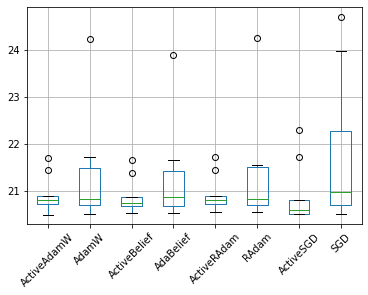

In [13]:
# pivot_ = pivot_.iloc[:-4]
ax = pivot_.boxplot(rot=45)

In [14]:
fig = ax.get_figure()

In [15]:
fig.savefig('./wiki2testppl.png', dpi=300, bbox_inches='tight')

## train loss

In [16]:
df['best_train'] = df.train_losses.map(min)
df['best_train_ppl'] = df['best_train'].map(lambda x: np.exp(x))
df

optim            lr     wd scheduler  bs  seed   best_ppl  \
0         adamw  5.000000e-07  0.001    LINEAR   1    42  22.519359   
1         adamw  1.000000e-04  0.001    LINEAR   1    42  22.267765   
2         adamw  1.000000e-05  0.000    LINEAR   1    42  21.068823   
3           sgd  5.000000e-05  0.000  CONSTANT   1    42  21.545019   
4         radam  1.000000e-08  0.000  CONSTANT   1    42  25.098052   
..          ...           ...    ...       ...  ..   ...        ...   
187  activeadam  5.000000e-08  0.010    LINEAR   1    42  25.615898   
188   adabelief  5.000000e-05  0.000  CONSTANT   1    42  21.415767   
189   activesgd  1.000000e-06  0.000  CONSTANT   1    42  22.305257   
190       adamw  1.000000e-05  0.001    LINEAR   1    42  21.068823   
191  activeadam  5.000000e-07  0.000  CONSTANT   1    42  21.291083   

     best_test                                       train_losses  \
0    21.844956  [3.517073392868042, 3.402616500854492, 3.35635...   
1    21.711022  [3.236656427383423, 2.923722982406616, 2.70815...   
2    20.523473  [3.27854323387146, 3.1392786502838135, 3.07949...   
3    20.979254  [3.4690518379211426, 3.387401580810547, 3.3536...   
4    24.251084  [3.735184907913208, 3.703855514526367, 3.67415...   
..         ...                                                ...   
187  24.756589  [3.665109157562256, 3.591106414794922, 3.55710...   
188  20.860154  [3.250737190246582, 3.043264865875244, 2.88528...   
189  21.710768  [3.6424996852874756, 3.5862009525299072, 3.563...   
190  20.523473  [3.27854323387146, 3.1392786502838135, 3.07949...   
191  20.746934  [3.514943838119507, 3.3959341049194336, 3.3422...   

                                            valid_ppls  \
0    [25.907044823633644, 24.7905923163653, 24.1885...   
1    [22.26776497177836, 22.611109206375268, 23.573...   
2    [21.795373062050288, 21.329661188183596, 21.15...   
3    [25.80324968032719, 25.08041802452274, 24.6878...   
4    [30.360717801865043, 30.075025402727302, 29.82...   
..                                                 ...   
187  [29.202253531548426, 28.51373509420506, 28.007...   
188  [21.578135265952167, 21.415767402149143, 21.63...   
189  [28.583781310042358, 28.347509145839545, 28.17...   
190  [21.795373062050288, 21.329661188183596, 21.15...   
191  [25.819003541294922, 24.600080841099984, 23.87...   

                                             test_ppls  epoch_time  \
0    [25.03985510157257, 23.965612887541138, 23.392...  343.641961   
1    [21.711022103659655, 22.108344875708443, 23.04...  337.151140   
2    [21.1891337850308, 20.759254028956445, 20.6049...  342.697503   
3    [25.02458261629898, 24.302898591438073, 23.912...  319.174458   
4    [29.212016391568785, 28.94973378959884, 28.721...  345.550004   
..                                                 ...         ...   
187  [28.143764249701054, 27.505969589544744, 27.03...  380.887849   
188  [21.03050528283861, 20.86015423165144, 21.1274...  354.016345   
189  [27.610530791452785, 27.40607080729397, 27.249...  328.211321   
190  [21.1891337850308, 20.759254028956445, 20.6049...  336.588602   
191  [24.955314162234696, 23.782178341819773, 23.10...  380.030288   

                                                epochs  best_train  \
0    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    3.229115   
1                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]    1.935557   
2    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    2.820213   
3    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    3.105624   
4    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    3.390654   
..                                                 ...         ...   
187  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    3.419461   
188  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    0.079829   
189  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    3.184368   
190  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...    2.820213   
191  [0, 1, 2, 3, 4,

In [17]:
pivot = df.pivot_table('best_train_ppl', df.optim, df.lr, aggfunc='min')
pivot

lr            1.000000e-08  5.000000e-08  1.000000e-07  5.000000e-07  \
optim                                                                  
activeadam       24.221227     20.586569     18.545003     15.566067   
activebelief     24.008368     20.357345     18.263079     11.270592   
activeradam      24.219148     20.582187     18.544543     11.684714   
activesgd              NaN           NaN           NaN     25.240024   
adabelief        29.088696     24.237852     22.579051     17.725040   
adamw            29.652803     24.450228     22.774556     19.777233   
radam            29.685363     24.472716     22.796265     18.051323   
sgd                    NaN           NaN           NaN     29.467779   

lr            1.000000e-06  5.000000e-06  1.000000e-05  5.000000e-05  \
optim                                                                  
activeadam       16.204207      8.037868      4.783260      1.431671   
activebelief      7.817546      2.428400      1.529856      1.076702   
activeradam       8.213134      2.583178      1.601672      1.079941   
activesgd        24.152028     21.767330     20.561969     19.299339   
adabelief        14.563318      5.239123      2.429988      1.083102   
adamw            19.294531     11.893692      7.756111      1.671175   
radam            14.980819      5.673691      2.667543      1.087988   
sgd              28.125110     25.188685     23.994880     22.323138   

lr            1.000000e-04  5.000000e-04  1.000000e-03  5.000000e-03  
optim                                                                 
activeadam        4.560641           NaN           NaN           NaN  
activebelief      1.065956           NaN           NaN           NaN  
activeradam       1.066444           NaN           NaN           NaN  
activesgd        17.347028     10.825272     11.595771      4.895608  
adabelief         1.071399           NaN           NaN           NaN  
adamw             4.984267           NaN           NaN           NaN  
radam             1.071275           NaN           NaN           NaN  
sgd              21.056625     16.565501     15.868615      7.567463

In [18]:
pivot_ = pivot.transpose()
pivot_

optim         activeadam  activebelief  activeradam  activesgd  adabelief  \
lr                                                                          
1.000000e-08   24.221227     24.008368    24.219148        NaN  29.088696   
5.000000e-08   20.586569     20.357345    20.582187        NaN  24.237852   
1.000000e-07   18.545003     18.263079    18.544543        NaN  22.579051   
5.000000e-07   15.566067     11.270592    11.684714  25.240024  17.725040   
1.000000e-06   16.204207      7.817546     8.213134  24.152028  14.563318   
5.000000e-06    8.037868      2.428400     2.583178  21.767330   5.239123   
1.000000e-05    4.783260      1.529856     1.601672  20.561969   2.429988   
5.000000e-05    1.431671      1.076702     1.079941  19.299339   1.083102   
1.000000e-04    4.560641      1.065956     1.066444  17.347028   1.071399   
5.000000e-04         NaN           NaN          NaN  10.825272        NaN   
1.000000e-03         NaN           NaN          NaN  11.595771        NaN   
5.000000e-03         NaN           NaN          NaN   4.895608        NaN   

optim             adamw      radam        sgd  
lr                                             
1.000000e-08  29.652803  29.685363        NaN  
5.000000e-08  24.450228  24.472716        NaN  
1.000000e-07  22.774556  22.796265        NaN  
5.000000e-07  19.777233  18.051323  29.467779  
1.000000e-06  19.294531  14.980819  28.125110  
5.000000e-06  11.893692   5.673691  25.188685  
1.000000e-05   7.756111   2.667543  23.994880  
5.000000e-05   1.671175   1.087988  22.323138  
1.000000e-04   4.984267   1.071275  21.056625  
5.000000e-04        NaN        NaN  16.565501  
1.000000e-03        NaN        NaN  15.868615  
5.000000e-03        NaN        NaN   7.567463

In [19]:
pivot_ = pivot_[['activeadam', 'activebelief', 'activeradam', 'activesgd', 'adamw', 'adabelief',
    'radam', 'sgd']]
pivot_= pivot_.rename(columns={'activeadam':'ActiveAdamW', 
                       'activebelief': 'ActiveBelief', 
                       'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
                       'adabelief': 'AdaBelief',
                       'radam': 'RAdam', 
                       'sgd': 'SGD'})
pivot_

optim         ActiveAdamW  ActiveBelief  ActiveRAdam  ActiveSGD      AdamW  \
lr                                                                           
1.000000e-08    24.221227     24.008368    24.219148        NaN  29.652803   
5.000000e-08    20.586569     20.357345    20.582187        NaN  24.450228   
1.000000e-07    18.545003     18.263079    18.544543        NaN  22.774556   
5.000000e-07    15.566067     11.270592    11.684714  25.240024  19.777233   
1.000000e-06    16.204207      7.817546     8.213134  24.152028  19.294531   
5.000000e-06     8.037868      2.428400     2.583178  21.767330  11.893692   
1.000000e-05     4.783260      1.529856     1.601672  20.561969   7.756111   
5.000000e-05     1.431671      1.076702     1.079941  19.299339   1.671175   
1.000000e-04     4.560641      1.065956     1.066444  17.347028   4.984267   
5.000000e-04          NaN           NaN          NaN  10.825272        NaN   
1.000000e-03          NaN           NaN          NaN  11.595771        NaN   
5.000000e-03          NaN           NaN          NaN   4.895608        NaN   

optim         AdaBelief      RAdam        SGD  
lr                                             
1.000000e-08  29.088696  29.685363        NaN  
5.000000e-08  24.237852  24.472716        NaN  
1.000000e-07  22.579051  22.796265        NaN  
5.000000e-07  17.725040  18.051323  29.467779  
1.000000e-06  14.563318  14.980819  28.125110  
5.000000e-06   5.239123   5.673691  25.188685  
1.000000e-05   2.429988   2.667543  23.994880  
5.000000e-05   1.083102   1.087988  22.323138  
1.000000e-04   1.071399   1.071275  21.056625  
5.000000e-04        NaN        NaN  16.565501  
1.000000e-03        NaN        NaN  15.868615  
5.000000e-03        NaN        NaN   7.567463

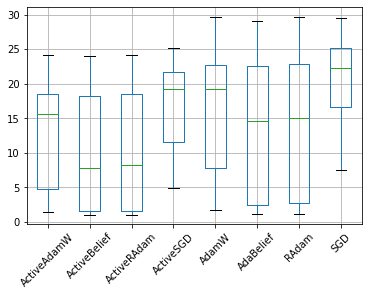

In [21]:
# pivot_ = pivot_.iloc[:-4]
ax = pivot_.boxplot(rot=45)

In [22]:
fig = ax.get_figure()

In [23]:
fig.savefig('./wiki2trainppl.png', dpi=300, bbox_inches='tight')